In [1]:
import pandas as pd
#show full output on DataFrame Rows
pd.set_option('display.max_rows', 505)

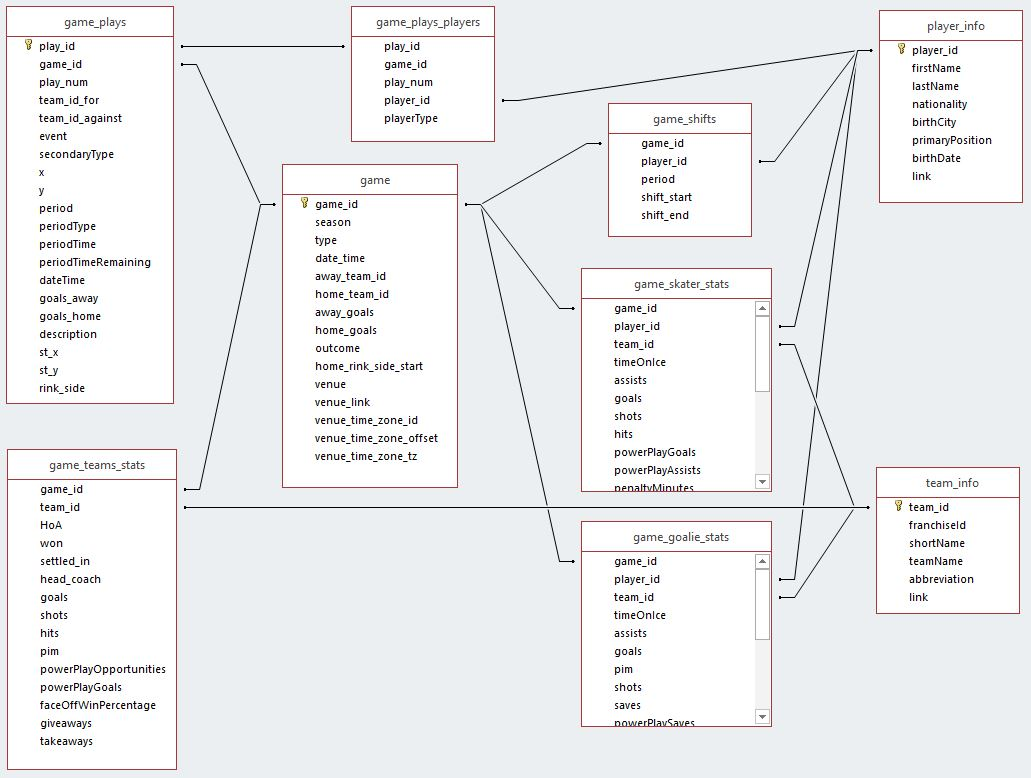

In [2]:
from IPython.display import Image
Image(filename='archive/table_relationships.JPG') 

Notes:

- check for duplicate values, and drop
- need to add players data set to find player names, only have player id
- I need to know who the home team is, will need to merge in the home team and away team based on game ID
- Worried a left join will not work, I am keep the values in the plays data set that don't have a player, I think I only want the plays that will have a player. I would think a left join on plays_player or switch my current left join to a right join. But I also think I would not want a value from either if it does not have a player so maybe a right join
    - there appears to be 53 values that are null for player ID. I will investigate what those are
    - The 53 values are only stoppage, we don't want those plays any how because they have no coordinate information and do not provide player insight. 
    - Will need to assess the difference in the inner versus right join

In [8]:
shots2022 = pd.read_csv('shots_2022.csv')

In [9]:
shots2022.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,43.0,47.0,47.0,8.0,8.0,0.0,0,0,0,...,44,0.214393,0.026009,0.398742,0.300830,0.022987,0.037040,0.710473,8,8
1,1,51.0,45.0,45.0,26.0,26.0,0.0,0,0,0,...,44,0.186673,0.007774,0.455486,0.294453,0.020666,0.034948,0.667152,27,27
2,2,59.0,-31.0,31.0,8.0,8.0,0.0,0,0,0,...,33,0.256798,0.046070,0.358080,0.259696,0.027936,0.051420,0.644651,8,-8
3,3,14.0,-76.0,76.0,-4.0,4.0,0.0,0,0,0,...,74,0.172590,0.296800,0.230564,0.183049,0.024885,0.092112,0.898032,-5,5
4,4,14.0,-82.0,82.0,12.0,12.0,0.0,0,0,0,...,81,0.128260,0.057435,0.446106,0.286419,0.019556,0.062224,0.759405,15,-15


In [4]:
plays = pd.read_csv("archive/game_plays.csv")

In [5]:
playsPlayer = pd.read_csv("archive/game_plays_players.csv")

In [6]:
games = pd.read_csv("archive/game.csv")

In [7]:
gameTeam = pd.read_csv("archive/game_teams_stats.csv")

In [8]:
player = pd.read_csv("archive/player_info.csv")

In [9]:
teams = pd.read_csv("archive/team_info.csv")

In [10]:
gameStats = pd.read_csv("archive/game_skater_stats.csv")

In [11]:
goals = pd.read_csv("archive/game_goals.csv")

/Users/Mackdig25/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
plays.drop_duplicates(inplace=True)
playsPlayer.drop_duplicates(inplace=True)
games.drop_duplicates(inplace=True)
gameTeam.drop_duplicates(inplace=True)
player.drop_duplicates(inplace=True)
teams.drop_duplicates(inplace=True)
gameStats.drop_duplicates(inplace=True)

In [12]:
plays.period.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
playsPlayer.shape

(7586604, 4)

In [14]:
games.shape

(26305, 15)

In [15]:
plays[['dateTime']].head()

,dateTime
0,2016-10-18 23:40:58
1,2016-10-19 01:35:28
2,2016-10-19 01:40:50
3,2016-10-19 01:40:50
4,2016-10-19 01:41:44


In [16]:
sampleP = plays[plays["game_id"] == 2016020045]

In [17]:
samplePP= playsPlayer[playsPlayer["game_id"]==2016020045]

In [18]:
sampleG = games[games["game_id"] == 2016020045]
sampleG

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT


In [19]:
mergedSampleLeft = sampleP.merge(samplePP, how='left', left_on=["game_id",'play_id'], right_on = ["game_id","play_id"])


In [20]:
mergedSampleLeft.shape

(505, 20)

In [21]:
nullMerged =mergedSampleLeft[mergedSampleLeft["player_id"].isna()]

In [22]:
# Merge plays and player plays
mergedSampleRight = sampleP.merge(samplePP, how='right', left_on=["game_id",'play_id'], right_on = ["game_id","play_id"])

In [23]:
mergedSampleRight.shape

(452, 20)

In [24]:
# Add the game information(Specifically home game)
mergedSampleRight = mergedSampleRight.merge(sampleG, how='right', left_on=["game_id"], right_on = ["game_id"])

In [25]:
mergedSampleRight.shape

(452, 34)

In [26]:
# Inner merge for getting game data
mergedSampleInner = sampleP.merge(samplePP, how='inner', left_on=["game_id",'play_id'], right_on = ["game_id","play_id"])


In [27]:
mergedSampleInner.shape

(452, 20)

In [28]:
mergedSampleInner = mergedSampleInner.merge(sampleG, how='inner', left_on=["game_id"], right_on = ["game_id"])

In [29]:
mergedSampleInner.shape

(452, 34)

In [12]:
# Combine plays and player players to get X Y coordinates
mergedData = plays.merge(playsPlayer, how='inner', left_on=["game_id",'play_id'], right_on = ["game_id","play_id"])
# Combine Merged DF and the games information to get home team
mergedData = mergedData.merge(games, how='inner', left_on=["game_id"], right_on = ["game_id"])

In [13]:
mergedData[['play_id',"event", 'playerType']][mergedData['event'] == 'Goal'].head()

,play_id,event,playerType
4,2016020045_6,Goal,Scorer
5,2016020045_6,Goal,Assist
6,2016020045_6,Goal,Assist
7,2016020045_6,Goal,Goalie
138,2016020045_97,Goal,Scorer


In [42]:
type(mergedData["season"][0])

numpy.int64

7774 Games Per Season

In [14]:
pbp2016 = mergedData[(mergedData["season"] == 20162017)]

In [15]:
pbp2016.shape

(610846, 34)

In [16]:
pbp2017 = mergedData[(mergedData["season"] == 20172018)]

In [25]:
pbp2017['event'].unique()

array(['Faceoff', 'Hit', 'Giveaway', 'Shot', 'Missed Shot',
       'Blocked Shot', 'Penalty', 'Goal', 'Takeaway'], dtype=object)

In [18]:
pbp2018 = mergedData[(mergedData["season"] == 20182019)]

In [28]:
pbp2018.shape

(5202208, 34)

In [29]:
pbp2018.drop_duplicates(inplace=True)

/Users/Mackdig25/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
pbp2018.shape

(650276, 34)

In [31]:
pbp2016.to_csv("2016NHLPbP.csv")

In [32]:
pbp2017.to_csv("2017NHLPbP.csv")

In [33]:
pbp2018.to_csv("2018NHLPbP.csv")